In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data",header=None)

1. Wife's age (numerical)
2. Wife's education (categorical) 1=low, 2, 3, 4=high
3. Husband's education (categorical) 1=low, 2, 3, 4=high
4. Number of children ever born (numerical)
5. Wife's religion (binary) 0=Non-Islam, 1=Islam
6. Wife's now working? (binary) 0=Yes, 1=No
7. Husband's occupation (categorical) 1, 2, 3, 4
8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high
9. Media exposure (binary) 0=Good, 1=Not good
10. Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term


In [3]:
headers=["wife_age","wife_edu","husb_edu","nr_child","wife_relig","wife_work","husb_occup","living_index","media_exposure","contraceptive_use"]
data.columns=headers
cat_headers=["wife_edu","husb_edu","wife_relig","wife_work","husb_occup","living_index","media_exposure","contraceptive_use"]
int_headers=["wife_age","nr_child"]

In [4]:
data[cat_headers]=data[cat_headers].astype('category')
data[int_headers]=data[int_headers].astype('int')

## Encoding 

### One Hot Encoding

In [5]:
categorical=data.select_dtypes("category").columns
ints=data.select_dtypes("int64").columns

In [6]:
from sklearn.preprocessing import OneHotEncoder

def scikit_one_hot_encoder(df,categorical_columns):
    categorical=df[categorical_columns]
    enc_hot = OneHotEncoder(handle_unknown='ignore',sparse=False)
    enc_hot.fit(categorical)
    X=pd.DataFrame(enc_hot.transform(categorical))
    X.columns=enc_hot.get_feature_names(categorical.columns)
    data_encoded=pd.concat([df, X], axis=1)
    data_encoded.drop(columns=categorical.columns,inplace=True)
    return data_encoded
data_encoded=scikit_one_hot_encoder(data,categorical)

In [7]:
data_encoded

,wife_age,nr_child,wife_edu_1,wife_edu_2,wife_edu_3,wife_edu_4,husb_edu_1,husb_edu_2,husb_edu_3,husb_edu_4,...,husb_occup_4,living_index_1,living_index_2,living_index_3,living_index_4,media_exposure_0,media_exposure_1,contraceptive_use_1,contraceptive_use_2,contraceptive_use_3
0,24,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,45,10,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,43,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,42,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,36,8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,33,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1469,33,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1470,39,8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1471,33,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


One hot encoding by scikitlearn is not very handy. A very special case for its use its when that we require the encoder can be reverted.  
For every other use where no reversion is required, it is better to use Pandas.

### One hot encoding with pandas

In [8]:
categoricaldf = pd.get_dummies(data=data[categorical])
encoded2=pd.concat([categoricaldf,data[int_headers]],axis=1)

In [9]:
encoded2

,wife_edu_1,wife_edu_2,wife_edu_3,wife_edu_4,husb_edu_1,husb_edu_2,husb_edu_3,husb_edu_4,wife_relig_0,wife_relig_1,...,living_index_2,living_index_3,living_index_4,media_exposure_0,media_exposure_1,contraceptive_use_1,contraceptive_use_2,contraceptive_use_3,wife_age,nr_child
0,0,1,0,0,0,0,1,0,0,1,...,0,1,0,1,0,1,0,0,24,3
1,1,0,0,0,0,0,1,0,0,1,...,0,0,1,1,0,1,0,0,45,10
2,0,1,0,0,0,0,1,0,0,1,...,0,0,1,1,0,1,0,0,43,7
3,0,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,1,0,0,42,9
4,0,0,1,0,0,0,1,0,0,1,...,1,0,0,1,0,1,0,0,36,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,0,0,0,1,0,0,0,1,0,1,...,0,0,1,1,0,0,0,1,33,2
1469,0,0,0,1,0,0,0,1,0,1,...,0,0,1,1,0,0,0,1,33,3
1470,0,0,1,0,0,0,1,0,0,1,...,0,0,1,1,0,0,0,1,39,8
1471,0,0,1,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,33,4


## Missing data

In [10]:
data1=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv")

In [11]:
pd.DataFrame(data1.value_counts().head(5)) #most frequent samples

0
Age Number of sexual partners First sexual intercourse Num of pregnancies Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives Hormonal Contraceptives (years) IUD IUD (years) STDs STDs (number) STDs:condylomatosis STDs:cervical condylomatosis STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes STDs:molluscum contagiosum STDs:AIDS STDs:HIV STDs:Hepatitis B STDs:HPV STDs: Number of diagnosis STDs: Time since first diagnosis STDs: Time since last diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann Schiller Citology Biopsy   
15  1.0                       14.0                     1.0                0.0    0.0            0.0                 0.0                     0.0                             0.0 0.0         0.0  0.0           0.0                 0.0                          0.0                         0.0                                0.0           0.0                              0.0                 0.0                        0.0       0.0      0.0              0.0      0                         ?                                ?                               0         0      0      0  0          0        0        0       4
17  2.0                       15.0                     1.0                0.0    0.0            0.0                 0.0                     0.0                             0.0 0.0         0.0  0.0           0.0                 0.0                          0.0                         0.0                                0.0           0.0                              0.0                 0.0                        0.0       0.0      0.0              0.0      0                         ?                                ?                               0         0      0      0  0          0        0        0       3
    1.0                       17.0                     1.0                0.0    0.0            0.0                 0.0                     0.0                             0.0 0.0         0.0  0.0           0.0                 0.0                          0.0                         0.0                                0.0           0.0                              0.0                 0.0                        0.0       0.0      0.0              0.0      0                         ?                                ?                               0         0      0      0  0          0        0        0       2
15  2.0                       14.0                     1.0                0.0    0.0            0.0                 0.0                     0.0                             0.0 0.0         0.0  0.0           0.0                 0.0                          0.0                         0.0                                0.0           0.0                              0.0                 0.0                        0.0       0.0      0.0              0.0      0                         ?                                ?                               0         0      0      0  0          0        0        0       2
21  4.0                       15.0                     1.0                0.0    0.0            0.0                 0.0                     0.0                             0.0 0.0         0.0  0.0           0.0                 0.0                          0.0                         0.0                                0.0           0.0                              0.0                 0.0                        0.0       0.0      0.0              0.0      0                         ?                                ?                               0         0      0      0  0          1        1        1       2

In [12]:
for i in range(len(data1.columns)):
    print(data1.columns[i])
    print(data1.iloc[:,i].value_counts().head(5))

Age
23    54
18    50
21    46
20    45
19    44
Name: Age, dtype: int64
Number of sexual partners
2.0    272
3.0    208
1.0    206
4.0     78
5.0     44
Name: Number of sexual partners, dtype: int64
First sexual intercourse
15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
Name: First sexual intercourse, dtype: int64
Num of pregnancies
1.0    270
2.0    240
3.0    139
4.0     74
?       56
Name: Num of pregnancies, dtype: int64
Smokes
0.0    722
1.0    123
?       13
Name: Smokes, dtype: int64
Smokes (years)
0.0            722
1.266972909     15
?               13
5.0              9
9.0              9
Name: Smokes (years), dtype: int64
Smokes (packs/year)
0.0             722
0.5132021277     18
?                13
1.0               6
3.0               5
Name: Smokes (packs/year), dtype: int64
Hormonal Contraceptives
1.0    481
0.0    269
?      108
Name: Hormonal Contraceptives, dtype: int64
Hormonal Contraceptives (years)
0.0     269
?       108
1.0      77
0.25     41
2.0 

In [13]:
for i in range(len(data1.columns)):
    print(data1.columns[i])
    print(data1.iloc[:,i].unique())
    print("**"*40)

Age
[18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]
********************************************************************************
Number of sexual partners
['4.0' '1.0' '5.0' '3.0' '2.0' '6.0' '?' '7.0' '15.0' '8.0' '10.0' '28.0'
 '9.0']
********************************************************************************
First sexual intercourse
['15.0' '14.0' '?' '16.0' '21.0' '23.0' '17.0' '26.0' '20.0' '25.0' '18.0'
 '27.0' '19.0' '24.0' '32.0' '13.0' '29.0' '11.0' '12.0' '22.0' '28.0'
 '10.0']
********************************************************************************
Num of pregnancies
['1.0' '4.0' '2.0' '6.0' '3.0' '5.0' '?' '8.0' '7.0' '0.0' '11.0' '10.0']
********************************************************************************
Smokes
['0.0' '1.0' '?']
********************************************************************************
Smokes (years)
['0.0' '37.0' '34.0' '1.266972909' 

The null value is represented by "?"

In [14]:
#using scikit learn simple Imputer
## turning ? into most frequent
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values='?', strategy='most_frequent')
X = imputer.fit_transform(data1)
X

array([[18, '4.0', '15.0', ..., 0, 0, 0],
       [15, '1.0', '14.0', ..., 0, 0, 0],
       [34, '1.0', '15.0', ..., 0, 0, 0],
       ...,
       [25, '2.0', '17.0', ..., 0, 1, 0],
       [33, '2.0', '24.0', ..., 0, 0, 0],
       [29, '2.0', '20.0', ..., 0, 0, 0]], dtype=object)

We can first transform into null for since the rest is number

In [15]:
def remove_null(e):# applies for all columns in the dataset
    if e=="?":
        return np.nan
    else:
        return e

data1=data1.applymap(remove_null)

now for another imputer for `np.nan`

In [16]:
#convert types to int
#data1.convert_dtypes().info()#try to infer datatypes (not very good)
data1.select_dtypes("object").astype("float")

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),...,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Time since first diagnosis,STDs: Time since last diagnosis
0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
854,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
855,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
856,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [17]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
knnimputed=pd.DataFrame(imputer.fit_transform(data1))
knnimputed.columns=data1.columns

In [18]:
knnimputed

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1.5,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,1.5,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,24.5,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,2.5,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,4.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,21.5,21.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.0,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,7.5,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,32.0,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,8.5,8.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,25.0,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,3.5,3.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
856,33.0,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Operations with DataFrame

### Selecting columns

In [45]:
#### masks
outliers = (data1['Age'] > 52)
data1.loc[outliers]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,Dx,Hinselmann,Schiller,Citology,Biopsy,Age-1,After18,two_rows,one,two
652,59,2.0,13.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,41,0,15.0,three,four
667,79,2.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,17,0,18.0,three,four
668,84,3.0,20.0,11.0,1.0,24.0,0.5132021277,0.0,0.0,0.0,...,0,0,1,0,0,79,1,23.0,three,four
676,70,4.0,27.0,3.0,1.0,3.0,0.75,0.0,0.0,0.0,...,0,0,0,0,0,45,1,31.0,three,four
682,70,1.0,16.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,42,0,17.0,three,four


In [20]:
#### masks for multiple columns
newmask = ((data1['Number of sexual partners'] == "3.0") & (data1['Age'] > 30))
data1.loc[newmask,("Age","Smokes")]##Selecting columns 

,Age,Smokes
4,46,0.0
5,42,0.0
6,51,1.0
9,44,1.0
10,44,0.0
...,...,...
842,36,1.0
848,31,0.0
849,32,1.0
852,43,0.0


In [21]:
#filtering and selecting columns
data1[data1["Age"]>25][["Number of sexual partners","First sexual intercourse"]]

,Number of sexual partners,First sexual intercourse
2,1.0,NaN
3,5.0,16.0
4,3.0,21.0
5,3.0,23.0
6,3.0,17.0
...,...,...
852,3.0,17.0
853,3.0,18.0
854,2.0,19.0
856,2.0,24.0


In [44]:
#filtering with pd.Where and related
data1["Age"].where(data1["Age"]<20) #Replace values where the condition is False. with "other" - easy replace
#pd.where(cond, other=nan, inplace=False, axis=None, level=None, errors='raise', try_cast=False)

0      18.0
1      15.0
2       NaN
3       NaN
4       NaN
       ... 
853     NaN
854     NaN
855     NaN
856     NaN
857     NaN
Name: Age, Length: 858, dtype: float64

In [23]:
#df query
data1.query('Age < `STDs: Number of diagnosis` +25')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
113,23,5.0,23.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
141,20,3.0,18.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
169,18,3.0,18.0,4.0,0.0,0.0,0.0,1.0,5.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,24,2.0,16.0,3.0,0.0,0.0,0.0,1.0,5.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
841,23,2.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
845,19,2.0,15.0,2.0,0.0,0.0,0.0,1.0,0.75,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
850,19,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [25]:
#filtering with pd.Where and related
data1.filter(items=['Age', 'IUD'])

,Age,IUD
0,18,0.0
1,15,0.0
2,34,0.0
3,52,0.0
4,46,0.0
...,...,...
853,34,0.0
854,32,0.0
855,25,0.0
856,33,0.0


In [26]:
##multiple filters
data1[(data1["Age"]>25) & (data1["Age"]<40)][["Number of sexual partners","First sexual intercourse"]]

,Number of sexual partners,First sexual intercourse
2,1.0,NaN
7,1.0,26.0
11,1.0,17.0
26,5.0,23.0
27,2.0,17.0
...,...,...
849,3.0,18.0
853,3.0,18.0
854,2.0,19.0
856,2.0,24.0


### Counts

In [27]:
#counts
data1["Age"].value_counts()

23    54
18    50
21    46
20    45
19    44
24    39
25    39
26    38
28    37
30    35
17    35
29    33
27    33
22    30
35    29
33    28
31    27
36    24
34    24
16    23
15    21
32    18
37    17
41    13
40    12
39     9
38     9
45     6
44     6
42     6
43     5
14     5
46     3
48     2
49     2
52     2
70     2
84     1
79     1
47     1
50     1
51     1
59     1
13     1
Name: Age, dtype: int64

In [55]:
##grouped counts
data1.groupby(['Number of sexual partners','Smokes']).size()

Number of sexual partners  Smokes
1.0                        0.0       195
                           1.0         8
10.0                       1.0         1
2.0                        0.0       240
                           1.0        28
28.0                       1.0         1
3.0                        0.0       155
                           1.0        48
4.0                        0.0        61
                           1.0        17
5.0                        0.0        33
                           1.0        11
6.0                        0.0         8
                           1.0         1
7.0                        0.0         5
                           1.0         2
8.0                        0.0         1
                           1.0         3
9.0                        1.0         1
dtype: int64

## Create features

In [28]:
data1["Age-1"]=data1["Age"].shift(periods=1, fill_value=0)##transform the Age for the age the previous result

In [29]:
#apply lambda function to a column
data1['Biopsy'].apply(lambda x: x+1)

0      1
1      1
2      1
3      1
4      1
      ..
853    1
854    1
855    1
856    1
857    1
Name: Biopsy, Length: 858, dtype: int64

In [30]:
def FirstAfter18(col):
    if float(col)>17:
        return 1
    return 0
data1["After18"]=data1['First sexual intercourse'].apply(lambda x: FirstAfter18(x))
data1.loc[(data1["After18"]>0),("Age","IUD","After18")]

,Age,IUD,After18
4,46,0.0,1
5,42,0.0,1
7,26,1.0,1
8,45,0.0,1
10,44,0.0,1
...,...,...,...
849,32,0.0,1
853,34,0.0,1
854,32,0.0,1
856,33,0.0,1


In [31]:
#over all dataset
def if_1_10(e):#replaces all 1 for tens in the dataset
    if e==1.0:
        return 10
    else:
        return e

data1.applymap(if_1_10)#works with lambda as well

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Age-1,After18
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,18,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,15,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,10,0,10,0,0,0,0,0,34,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0,0,0,0,0,0,0,0,52,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,43,10
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0,0,0,0,0,0,0,0,34,10
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0,0,0,0,0,0,10,0,32,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0,0,0,0,0,0,0,0,25,10


In [32]:
# apply function with several columns
def two_rows(row):
    two=float(row["Number of sexual partners"]) + float(row["First sexual intercourse"])
    return two
    
data1["two_rows"]=data1.apply(two_rows,axis=1)

In [33]:
#returning several columns
def separaters(element):
    if element["Age"]==18:
        return "one","two"
    else:
        return "three","four"

data1[["one","two"]]=data1.apply(separaters,axis=1,result_type="expand")#only works for full df

## Detecting outtliers

In [34]:
from sklearn.covariance import EllipticEnvelope
# Create detector
outlier_detector = EllipticEnvelope(contamination=.1)

# Fit detector
outlier_detector.fit(knnimputed)

# Predict outliers
detec=outlier_detector.predict(knnimputed) #return an npArray with the same number of element as rows of original

/home/john/.conda/envs/py3-wsl/lib/python3.7/site-packages/sklearn/covariance/_robust_covariance.py:647: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


In [35]:
#transform array of -1 (outlier) and 1 (non.outlier) to a boolean and filter DF
toBool = lambda t: True if (t==-1) else False

detec_bool = np.array([toBool(xi) for xi in detec])

In [36]:
outliers=knnimputed.iloc[detec_bool,:]
outliers

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
3,52.0,5.0,16.0,4.0,1.0,37.0,37.00,1.0,3.00,0.0,...,4.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,51.0,3.0,17.0,6.0,1.0,34.0,3.40,0.0,0.00,1.0,...,5.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
8,45.0,1.0,20.0,5.0,0.0,0.0,0.00,0.0,0.00,0.0,...,9.5,9.5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
18,42.0,2.0,20.0,2.5,0.0,0.0,0.00,1.0,7.00,1.0,...,21.5,21.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,41.0,3.0,17.0,4.0,0.0,0.0,0.00,1.0,10.00,0.0,...,21.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,33.0,3.0,19.0,3.0,0.0,0.0,0.00,1.0,0.16,1.0,...,11.5,11.5,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
822,36.0,3.0,20.0,2.0,0.0,0.0,0.00,1.0,6.00,0.0,...,16.0,16.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
826,33.0,4.0,17.0,0.0,0.0,0.0,0.00,1.0,0.75,0.0,...,11.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
831,40.0,3.0,23.0,2.0,0.0,0.0,0.00,0.0,0.00,0.0,...,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Visualize

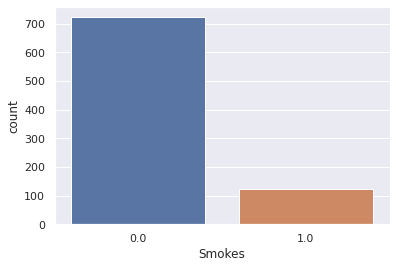

In [46]:
#sns, slower
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Smokes", data=data1)

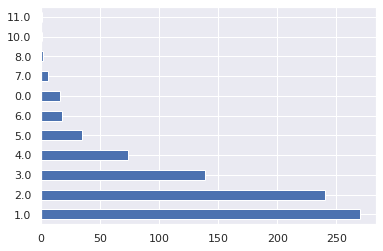

In [48]:
data1['Num of pregnancies'].value_counts().plot(kind='barh');